# Building a Prediction API using Flask and Machine Learning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('E:/predictapp/flaskapi/AmesHousing.csv',header=0)

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
df = df.drop(['Order','PID','Fence','Alley','Misc Feature','Pool QC'], axis=1)

In [7]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
df = df.drop(['BsmtFin SF 2','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val'],axis=1)

In [9]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,...,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,559.262547,...,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,439.494153,...,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,219.000000,...,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,466.000000,...,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,802.000000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,...,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,12.000000,2010.000000,755000.000000


## Removing Outliers

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

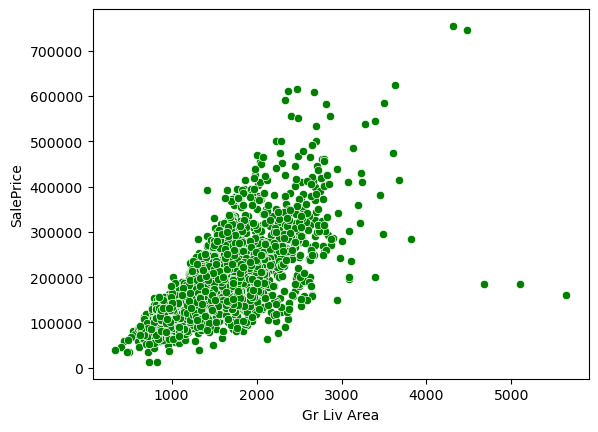

In [11]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, color='g')

<Axes: xlabel='Mas Vnr Area', ylabel='SalePrice'>

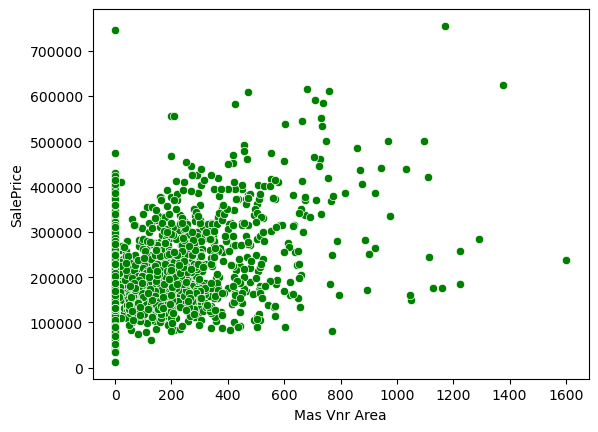

In [12]:
sns.scatterplot(x='Mas Vnr Area', y='SalePrice', data=df, color='g')

<Axes: xlabel='Wood Deck SF', ylabel='SalePrice'>

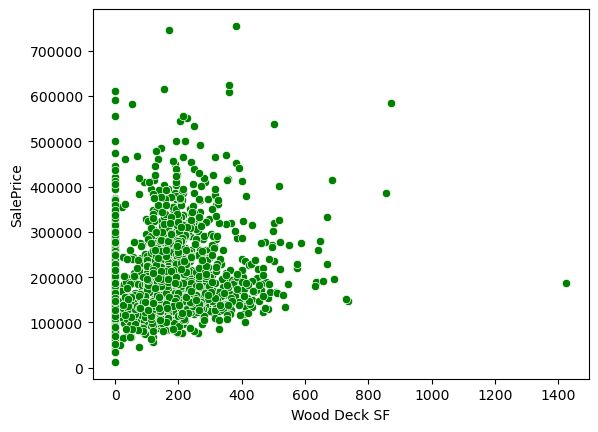

In [13]:
sns.scatterplot(x='Wood Deck SF', y='SalePrice', data=df, color='g')

In [14]:
index_drop=df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df=df.drop(index_drop, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

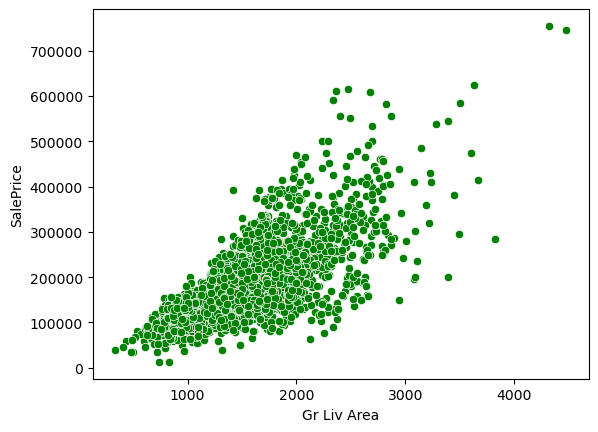

In [15]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, color='g')

In [16]:
index_drop=df[(df['Mas Vnr Area']>1400) & (df['SalePrice']<400000)].index
df=df.drop(index_drop, axis=0)

<Axes: xlabel='Mas Vnr Area', ylabel='SalePrice'>

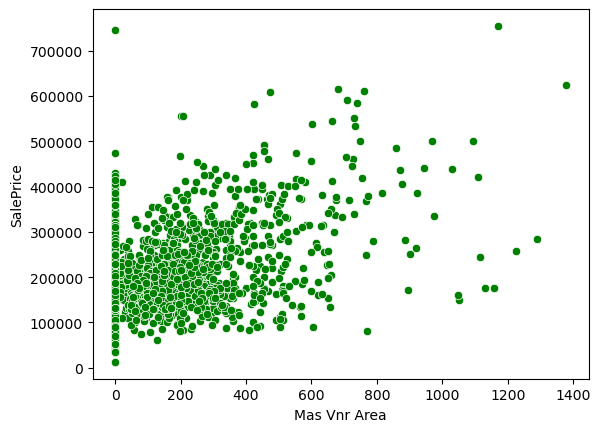

In [17]:
sns.scatterplot(x='Mas Vnr Area', y='SalePrice', data=df, color='g')

In [18]:
index_drop=df[(df['Wood Deck SF']>800) & (df['SalePrice']<400000)].index
df=df.drop(index_drop, axis=0)

<Axes: xlabel='Wood Deck SF', ylabel='SalePrice'>

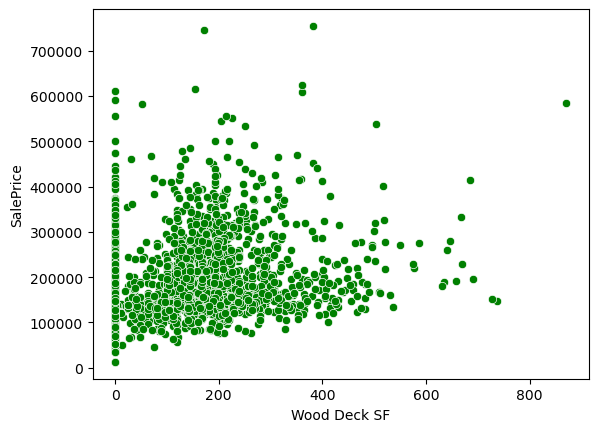

In [19]:
sns.scatterplot(x='Wood Deck SF', y='SalePrice', data=df, color='g')

In [20]:
df['bathrooms'] = (df['Bsmt Full Bath']+df['Bsmt Half Bath'] + df['Full Bath']+df['Half Bath'])

In [21]:
del df['Bsmt Full Bath']
del df['Bsmt Half Bath']
del df['Full Bath']
del df['Half Bath']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2924 entries, 0 to 2929
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2924 non-null   int64  
 1   MS Zoning        2924 non-null   object 
 2   Lot Frontage     2435 non-null   float64
 3   Lot Area         2924 non-null   int64  
 4   Street           2924 non-null   object 
 5   Lot Shape        2924 non-null   object 
 6   Land Contour     2924 non-null   object 
 7   Utilities        2924 non-null   object 
 8   Lot Config       2924 non-null   object 
 9   Land Slope       2924 non-null   object 
 10  Neighborhood     2924 non-null   object 
 11  Condition 1      2924 non-null   object 
 12  Condition 2      2924 non-null   object 
 13  Bldg Type        2924 non-null   object 
 14  House Style      2924 non-null   object 
 15  Overall Qual     2924 non-null   int64  
 16  Overall Cond     2924 non-null   int64  
 17  Year Built       29

## Missing value Imputation for Numerical columns

In [24]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())

In [25]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].mean())

In [26]:
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(df['BsmtFin SF 1'].mean())

In [27]:
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(df['Bsmt Unf SF'].mean())

In [28]:
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].mean())

In [29]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [30]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median())

In [31]:
df['Garage Cars'] = df['Garage Cars'].fillna(df['Garage Cars'].median())

In [32]:
df['Garage Area'] = df['Garage Area'].fillna(df['Garage Area'].mean())

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2924 entries, 0 to 2929
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2924 non-null   int64  
 1   MS Zoning        2924 non-null   object 
 2   Lot Frontage     2924 non-null   float64
 3   Lot Area         2924 non-null   int64  
 4   Street           2924 non-null   object 
 5   Lot Shape        2924 non-null   object 
 6   Land Contour     2924 non-null   object 
 7   Utilities        2924 non-null   object 
 8   Lot Config       2924 non-null   object 
 9   Land Slope       2924 non-null   object 
 10  Neighborhood     2924 non-null   object 
 11  Condition 1      2924 non-null   object 
 12  Condition 2      2924 non-null   object 
 13  Bldg Type        2924 non-null   object 
 14  House Style      2924 non-null   object 
 15  Overall Qual     2924 non-null   int64  
 16  Overall Cond     2924 non-null   int64  
 17  Year Built       29

## Countplots for Textual data

C:\Users\HARISH\AppData\Local\Temp\ipykernel_8852\3699184236.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


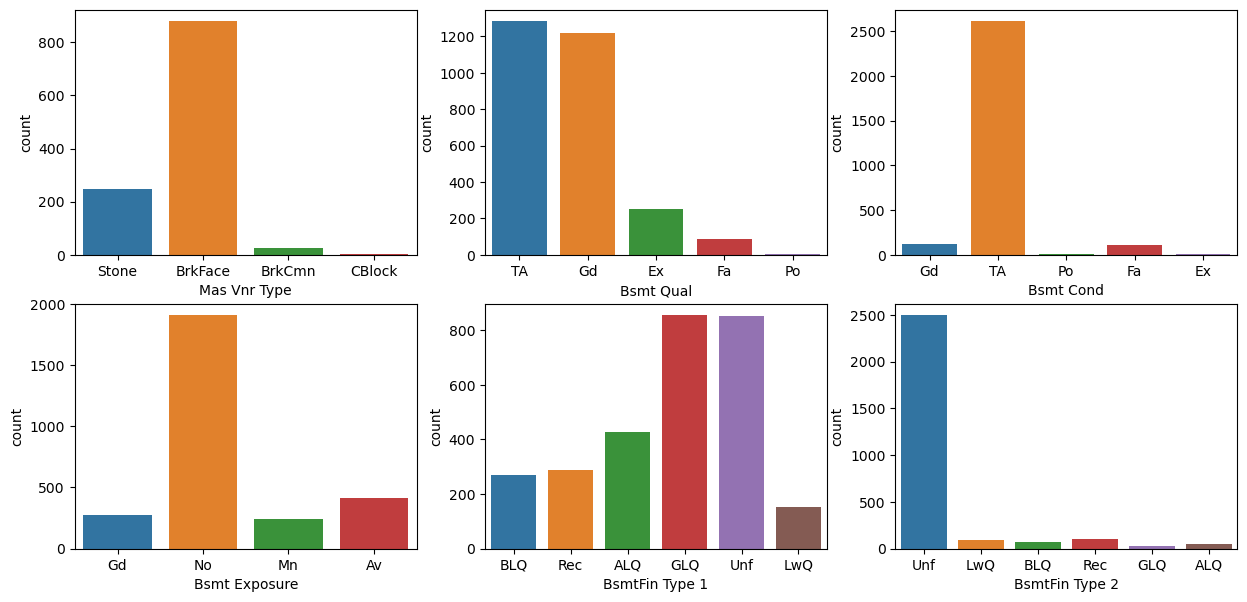

In [35]:
fig,axis =plt.subplots(2,3,figsize=(15,7))
sns.countplot(x=df['Mas Vnr Type'], ax=axis[0,0])
sns.countplot(x=df['Bsmt Qual'], ax=axis[0,1])
sns.countplot(x=df['Bsmt Cond'], ax=axis[0,2])
sns.countplot(x=df['Bsmt Exposure'], ax=axis[1,0])
sns.countplot(x=df['BsmtFin Type 1'], ax=axis[1,1])
sns.countplot(x=df['BsmtFin Type 2'], ax=axis[1,2])
fig.show()

C:\Users\HARISH\AppData\Local\Temp\ipykernel_8852\2486681746.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


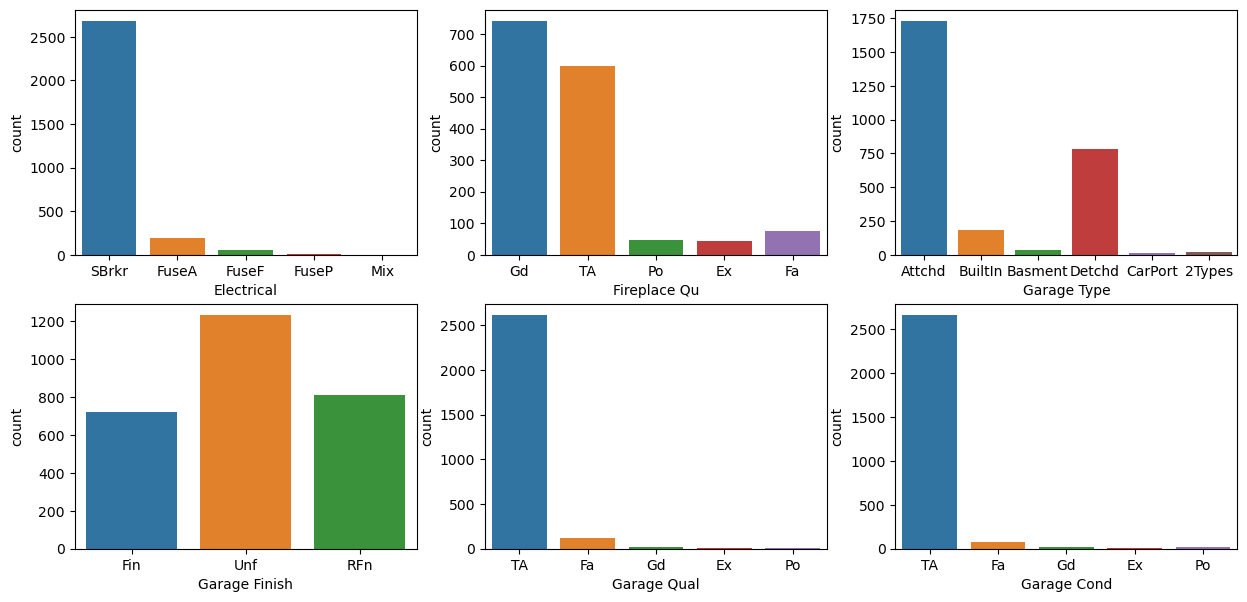

In [36]:
fig,axis =plt.subplots(2,3,figsize=(15,7))
sns.countplot(x=df['Electrical'], ax=axis[0,0])
sns.countplot(x=df['Fireplace Qu'], ax=axis[0,1])
sns.countplot(x=df['Garage Type'], ax=axis[0,2])
sns.countplot(x=df['Garage Finish'], ax=axis[1,0])
sns.countplot(x=df['Garage Qual'], ax=axis[1,1])
sns.countplot(x=df['Garage Cond'], ax=axis[1,2])
fig.show()

## Missing Value imputation for Textual data

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
Mas_Vnr_Type_impute = SimpleImputer(strategy='most_frequent')
df[['Mas Vnr Type']] = Mas_Vnr_Type_impute.fit_transform(df[['Mas Vnr Type']])

In [40]:
Bsmt_Qual_impute = SimpleImputer(strategy='most_frequent')
df[['Bsmt Qual']] = Bsmt_Qual_impute.fit_transform(df[['Bsmt Qual']])

In [41]:
Bsmt_Cond_impute = SimpleImputer(strategy='most_frequent')
df[['Bsmt Cond']] = Bsmt_Cond_impute.fit_transform(df[['Bsmt Cond']])

In [42]:
Bsmt_Exposure_impute = SimpleImputer(strategy='most_frequent')
df[['Bsmt Exposure']] = Bsmt_Exposure_impute.fit_transform(df[['Bsmt Exposure']])

In [43]:
BsmtFin_Type_1_impute = SimpleImputer(strategy='most_frequent')
df[['BsmtFin Type 1']] = BsmtFin_Type_1_impute.fit_transform(df[['BsmtFin Type 1']])

In [44]:
BsmtFin_Type_2_impute = SimpleImputer(strategy='most_frequent')
df[['BsmtFin Type 2']] = BsmtFin_Type_2_impute.fit_transform(df[['BsmtFin Type 2']])

In [45]:
Electrical_impute = SimpleImputer(strategy='most_frequent')
df[['Electrical']] = Electrical_impute.fit_transform(df[['Electrical']])

In [46]:
Fireplace_Qu_impute = SimpleImputer(strategy='most_frequent')
df[['Fireplace Qu']] = Fireplace_Qu_impute.fit_transform(df[['Fireplace Qu']])

In [47]:
Garage_Type_impute = SimpleImputer(strategy='most_frequent')
df[['Garage Type']] = Garage_Type_impute.fit_transform(df[['Garage Type']])

In [48]:
Garage_Finish_impute = SimpleImputer(strategy='most_frequent')
df[['Garage Finish']] = Garage_Finish_impute.fit_transform(df[['Garage Finish']])

In [49]:
Garage_Qual_impute = SimpleImputer(strategy='most_frequent')
df[['Garage Qual']] = Garage_Finish_impute.fit_transform(df[['Garage Qual']]) 

In [50]:
Garage_Cond_impute = SimpleImputer(strategy='most_frequent')
df[['Garage Cond']] = Garage_Cond_impute.fit_transform(df[['Garage Cond']])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2924 entries, 0 to 2929
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2924 non-null   int64  
 1   MS Zoning        2924 non-null   object 
 2   Lot Frontage     2924 non-null   float64
 3   Lot Area         2924 non-null   int64  
 4   Street           2924 non-null   object 
 5   Lot Shape        2924 non-null   object 
 6   Land Contour     2924 non-null   object 
 7   Utilities        2924 non-null   object 
 8   Lot Config       2924 non-null   object 
 9   Land Slope       2924 non-null   object 
 10  Neighborhood     2924 non-null   object 
 11  Condition 1      2924 non-null   object 
 12  Condition 2      2924 non-null   object 
 13  Bldg Type        2924 non-null   object 
 14  House Style      2924 non-null   object 
 15  Overall Qual     2924 non-null   int64  
 16  Overall Cond     2924 non-null   int64  
 17  Year Built       29

## Creating Dummy variables for categorical data 

In [53]:
df=pd.get_dummies(df,drop_first=True)

In [54]:
df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,137.0,...,False,False,False,False,True,False,False,False,True,False


In [55]:
df.shape

(2924, 240)

## X-Y Independent and Dependent Split

In [57]:
X = df.loc[:,df.columns!='SalePrice']

In [58]:
y = df['SalePrice']

In [59]:
print(X.shape,y.shape)

(2924, 239) (2924,)


## Train-Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [63]:
X_train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2851,70,69.000000,4899,6,8,1920,1950,0.0,305.0,450.0,...,False,False,False,False,True,False,False,False,True,False
2830,160,24.000000,2522,6,5,2004,2006,50.0,0.0,970.0,...,False,False,False,False,True,False,False,False,True,False
1890,20,80.000000,8800,7,6,1966,1966,202.0,654.0,520.0,...,False,False,False,False,False,False,False,False,True,False
1572,20,69.077207,15498,8,6,1976,1976,0.0,1165.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2304,20,62.000000,10447,5,6,1984,1984,0.0,516.0,348.0,...,False,False,False,False,True,False,False,False,True,False


In [64]:
y_train.head()

2851    149000
2830    130000
1890    163500
1572    287000
2304    124500
Name: SalePrice, dtype: int64

In [65]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2339, 239) (585, 239) (2339,) (585,)


In [66]:
from sklearn import preprocessing

In [67]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [68]:
X_train = scaler.transform(X_train)

In [69]:
X_test = scaler.transform(X_test)

## Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
lm_r= Ridge()

In [73]:
lm_r.fit(X_train, y_train)

Ridge()

In [74]:
y_test_pred_r = lm_r.predict(X_test)

In [75]:
y_train_pred_r = lm_r.predict(X_train)

## Performance metrics for Ridge regression

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_test, y_test_pred_r)

0.9181979212523809

In [79]:
r2_score(y_train, y_train_pred_r)

0.9385996126225072

In [80]:
import pickle

In [81]:
pickle.dump(lm_r, open('model.pkl','wb'))